# Part II - Fordgobike Dataset
## by  _Oladimeji Nurudeen_

## Investigation Overview


For this presentation, I focus on the influence of time, day of week, gender, age user type and station locations on trip durations and frequencies. I start by introducing the individual distribution of duration and age variables. Afterwards, I looked at the relationships between each of the above features versus trip frequencies and durations. I looked at each of the categorical variables: time, day of week, user type, start and end stations one by one. I then used the scatter plot vs heatplot to explore relationship between age and trip duration. Finally, I used a scatter plot to explore relationships between trip durations and ages across gender.

Key insights from the investigation include:

- Trip duration is not necessarily affected by gender
- The number of trips in males is way more than the number in females. This needs to be investigated further
- All trip durations for customers are greater than the median trip duration for a suscriber. An explanation for this might be that subscribers take rides for their routine short travels. On the other hand, customers take rides seldomly to travel long distances. Very likely, most of these customers are tourists.
- Stations in San Francisco dominate the list of top 10. Apart from being in the city, more visits to the tourist attractions at Ferry Building and Embarcadero might be responsible for this. Many stations in San Francisco connect to these tourist attractions. 

## Dataset Overview

This dataset is for _Fordgobike bike sharing system_. It contains information about 174952 trips for the month and year, February, 2019. Information in the dataset include trip durations and time, users information, start and end stations. There are 174952 trips in the dataset with 10 features:

> Trip duration in seconds, start_station_name, end_station_name, user_type, member_gender, bike_share_for_all_trip, day_of_week, hour, day_part, age

Only duration and age variables are numeric in nature, other variables are one of category, string, integer, float or datetime objects datatypes.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# set style as darkgrid with seaborn
sb.set_style(style='darkgrid')
# set plots to be embedded inline
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fordgobike = pd.read_csv('fordgobike.csv')

In [3]:
# convert the start_time column from object datatype to datetime datatype
fordgobike['start_time'] = pd.to_datetime(fordgobike['start_time'])

# extract year, month, day of week and hour from start_time column
fordgobike['year'] = fordgobike['start_time'].dt.year
fordgobike['month'] = fordgobike['start_time'].dt.month
fordgobike['day_of_week'] = fordgobike['start_time'].dt.day_name()
fordgobike['hour'] = fordgobike['start_time'].dt.hour

In [4]:
# convert the start_time column from object datatype to datetime datatype
fordgobike['start_time'] = pd.to_datetime(fordgobike['start_time'])

# extract year, month, day of week and hour from start_time column
fordgobike['year'] = fordgobike['start_time'].dt.year
fordgobike['month'] = fordgobike['start_time'].dt.month
fordgobike['day_of_week'] = fordgobike['start_time'].dt.day_name()
fordgobike['hour'] = fordgobike['start_time'].dt.hour

In [5]:
# create feature:day part from the hour column
time_intervals = [0,4,11,16,20,23]
time_labels=['Midnight', 'Morning', 'Afternoon', 'Evening', 'Night']
# use a for-loop to iterate over the hour column 
for hour in ['hour']:
    fordgobike[f'day_part']=pd.cut(fordgobike[hour], bins=time_intervals, labels=time_labels, include_lowest=True)
    

In [6]:
# convert day part, and day of week into ordered categorical types
ordinal_var_dict = {'day_part': ['Midnight', 'Morning', 'Afternoon', 'Evening', 'Night'],
                    'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}

# use a for-loop to iterate over the dictionary:ordinal_var_dict
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    fordgobike[var] = fordgobike[var].astype(ordered_var)

In [7]:
# I will make a copy of the dataframe and perform some cleaning
fordgobike_clean = fordgobike.copy()
# Drop null values in the dataset
fordgobike_clean.dropna(inplace=True)
# Use lambda expression to create age column from member_birth_year column by subtracting member_birth_year from 2019
# 2019 is the year of rides
# Convert age datatype to integer using int function in the lambda expression
fordgobike_clean['age'] = fordgobike_clean['member_birth_year'].apply(lambda x: int(2019 - x))
# create a to_drop_list and drop unnecessary columns from the dataframe
to_drop_list = ['start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'member_birth_year', 'year', 'month']
fordgobike_clean.drop(to_drop_list, axis=1, inplace=True)

## (Visualization 1)

I'll start by looking at the distribution of the first variable of interest. The distribution of trip durations is right skewed. Most trips have durations below 2000 seconds. I set x-axis limit to 2000 so that the spread can be more conspicuous. The mode of the distribution is around 400 seconds.


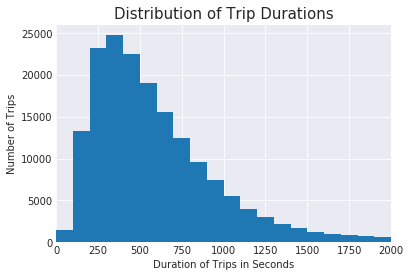

In [8]:
# I will start by using standard scaled plots of histogram
bins = np.arange(0, fordgobike_clean['duration_sec'].max() + 100, 100)
plt.hist(data = fordgobike_clean, x = 'duration_sec', bins = bins);

plt.title('Distribution of Trip Durations', fontsize = 15);
plt.xlabel('Duration of Trips in Seconds');
plt.ylabel('Number of Trips');
plt.xlim(0, 2000);

## (Visualization 2)

> What is the age distribution of travellers?

The age distribution of travellers is also right skewed. Most riders are within the age of 20 and 40 years. This is as expected due to their physical capacity. The least riders are below 20 or above 60 years as expected. Riders above 60 seems inpractical while riders above 80 represents outliers. Ages above 100 reasonably represent incorrect data. I will remove these outliers.

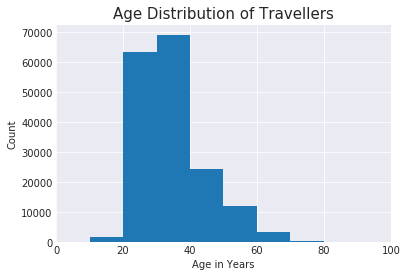

In [9]:
bins = np.arange(0, fordgobike_clean['age'].max() + 10, 10)
plt.hist(data = fordgobike_clean, x = 'age', bins = bins);

plt.title('Age Distribution of Travellers', fontsize = 15)
plt.xlabel('Age in Years')
plt.ylabel('Count')
plt.xlim(0, 100);

In [10]:
# I will now remove rows with outliers in the age column. I will use 100 years as the cut-off point.
fordgobike_clean = fordgobike_clean.query('age < 100')

## (Visualization 3)

> What is the distribution of trips based on hour and day?

The most common hour is 17 (5pm evening), then 8am morning. In general, the peak areas are either in the morning or evening. This can be explained with work lifestyle _-setting out in the morning and returning in the evening_. Midnights (0, 1, 2, 3, 4, 5) have least trip counts as expected. Thursday is the most popular day of travel, then Tuesday. Weekends have the least trip counts as expected, because people tend to stay indoor on weekends. February is the only month in the start_time column, hence, it won't be useful for further analysis.

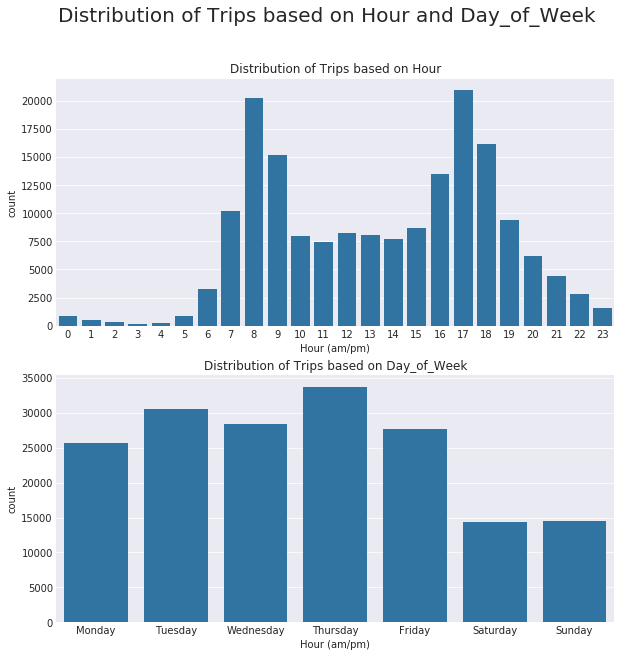

In [11]:
# Use standard scaled plots of histogram in a subplot function to show trip distribtion
# based on hour and day_of_week
fig = plt.figure(figsize = [10, 10])
color = sb.color_palette()[0]

plt.subplot(2, 1, 1)
sb.countplot(data = fordgobike_clean, x = 'hour', color = color)
plt.title('Distribution of Trips based on Hour')
plt.xlabel('Hour (am/pm)');

plt.subplot(2, 1, 2)
sb.countplot(data = fordgobike_clean, x = 'day_of_week', color = color)
plt.title('Distribution of Trips based on Day_of_Week')
plt.xlabel('Hour (am/pm)');

fig.suptitle('Distribution of Trips based on Hour and Day_of_Week', fontsize = 20);

## (Visualization 4)

> How does the user type affects trip duration?

All trip durations for customers are greater than the median trip duration for a suscriber. This is unexpected because I expected that the trip durations for subscribers, like trip frequencies, will be higher for subscribers. An explanation for this might be that subscribers take rides for their routine short travels. On the other hand, customers take rides seldomly to travel long distances. Most of these customers are likely tourists.

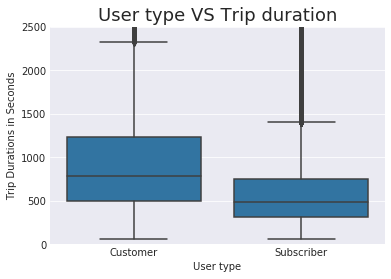

In [12]:
# Use a boxplot to explore relationship between user type and trip duration
base_color = sb.color_palette()[0]
sb.boxplot(data = fordgobike_clean, x = 'user_type', y = 'duration_sec', color = base_color);
plt.ylim(0, 2500);
plt.title('User type VS Trip duration', fontsize = 18);
plt.xlabel('User type');
plt.ylabel('Trip Durations in Seconds');

## (Visualization 5)

> What is the gender distribution among travellers?

Male has the largest percentage relative frequency of 74.6%, as opposed to 23.3% for Female. This means Male riders are more common. Other represents 2.1% of the population, which is very negligible.

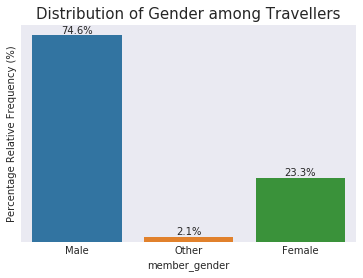

In [13]:
# Define a function that changes the count plot numbers into percentages relative frequencies
def percentage_plotter(plot, feature):
    """
    Arguments: This function takes in the initial plot and feature -the column of interest- as arguments.
    Operation: It uses the ratio of height of each bar to the total length of the feature to generate a percentage
    Return: This function then returns the annotated bar plot of the percentages
    """
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 10, va='bottom', ha='center')
    # Increase data to ink ratio by removing chart junks which are unnecessary features
    plot.spines['top'].set_visible(False)
    plot.spines['right'].set_visible(False)
    plot.spines['left'].set_visible(False)
    plt.yticks([])
    plt.ylabel('Percentage Relative Frequency (%)')
    
# Use the percentage plotter to plot bar chart showing distribution of gender
plot = sb.countplot(data=fordgobike_clean, x='member_gender')
percentage_plotter(plot, fordgobike_clean['member_gender'])
plt.title('Distribution of Gender among Travellers', fontsize=15);

## (Visualization 6)

> What is the most frequent combination of start and end station?

Most stations in San Francisco connect to public transportations such as Caltrain, Bart and Ferry. The Embarcadero at Sansome St is very close to Ferry building and located in financial district. Market St at 10th St and Berry St at 4th St are also close to Bart station. The proximities explain their connections and shared popularity.

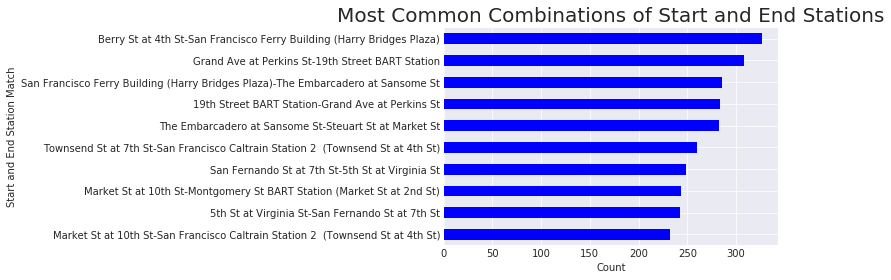

In [14]:
# create a new column to concatenate both start and end stations
# use standard scaled plot of bar chart to show the most common combinations of start and end stations
fordgobike_clean['start_to_end'] = fordgobike_clean['start_station_name'].str.cat(fordgobike_clean['end_station_name'], sep = '-')

fordgobike_clean['start_to_end'].value_counts(ascending=True).tail(10).plot.barh(color = 'blue')
plt.title('Most Common Combinations of Start and End Stations', fontsize=20)
plt.ylabel('Start and End Station Match')
plt.xlabel('Count');

## (Visualization 7)

> How does the age of traveller affects the trip duration?

The largest trip durations are within ages 20 to 40 years. It is also evident from the heatmap that a larger percentage of trips are by riders aged 20 to 40 years, and some between 40 and 60 years.

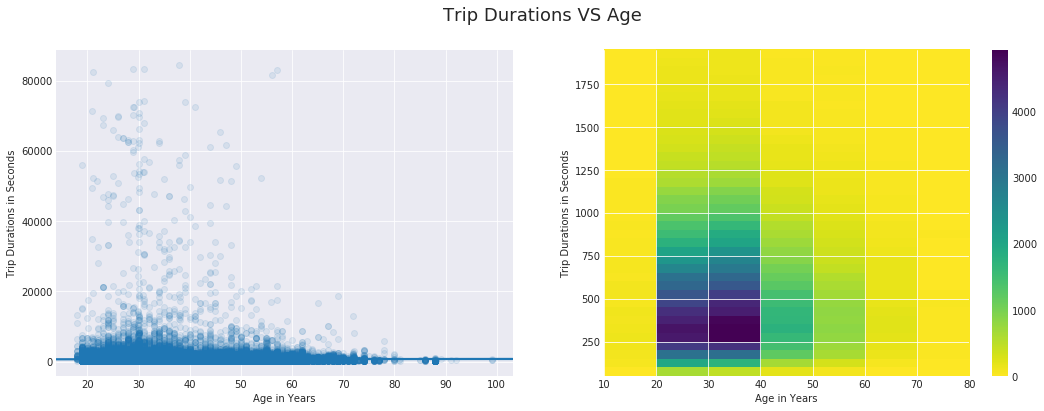

In [15]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = fordgobike_clean, x = 'age', y = 'duration_sec', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=True)
plt.xlabel('Age in Years')
plt.ylabel('Trip Durations in Seconds');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
bins_x = np.arange(10, 80+10, 10)
bins_y = np.arange(50, fordgobike_clean['duration_sec'].quantile(0.97)+50, 50)
plt.hist2d(data = fordgobike_clean, x = 'age', y = 'duration_sec', bins = [bins_x, bins_y], cmap='viridis_r')
plt.colorbar()
plt.xlabel('Age in Years')
plt.ylabel('Trip Durations in Seconds');
plt.suptitle('Trip Durations VS Age', fontsize = 18);

## (Visualization 8)

> How does the trip durations compare with gender across different ages?

From the visualization above, there doesn't seem to be a strong indication that one gender necessarily rides longer than the other. The data shows that people who specified their gender as "Female" or "Other" tend to ride just as long as those who specified their gender as "Male" as all the data points are interspersed. The long tail in age axis is unsurprising, as we have already seen in the age distribution.

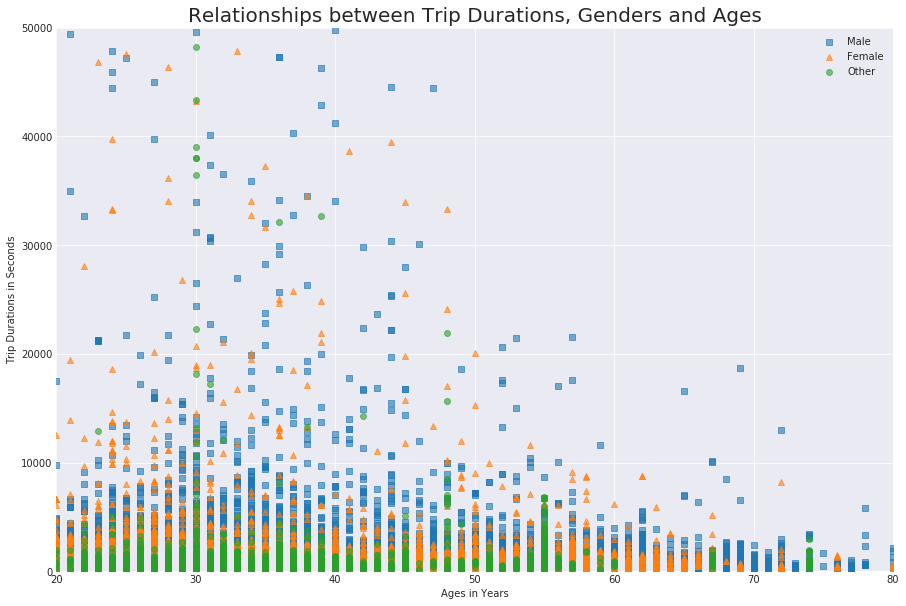

In [16]:
# use a single scatter plot to show relationship between trip durations, genders and ages
plt.figure(figsize = (15,10))

# create a list of lists of gender and markers
gender_markers = [['Male', 's'],
               ['Female', '^'],
               ['Other', 'o']]
# use a for-loop to map marker to each gender in the dataset
for gender, marker in gender_markers:
    df_gender = fordgobike_clean[fordgobike_clean['member_gender'] == gender]
    plt.scatter(data = df_gender, x = 'age', y = 'duration_sec', marker = marker, alpha = 6/10);
plt.legend(['Male', 'Female', 'Other']);
# To avoid a clumsy chart and make the distribution more visible, set both x and y limits
plt.xlim(20, 80);
plt.ylim(0, 50000);
plt.title('Relationships between Trip Durations, Genders and Ages', fontsize = 20);
plt.xlabel('Ages in Years');
plt.ylabel('Trip Durations in Seconds');

### Generate Slideshow
Use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 605007 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 